In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster


In [3]:
data = pd.read_csv('wholesale2.csv')


In [4]:
print(data.head())

   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185


In [5]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data.iloc[:, 2:])

In [6]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

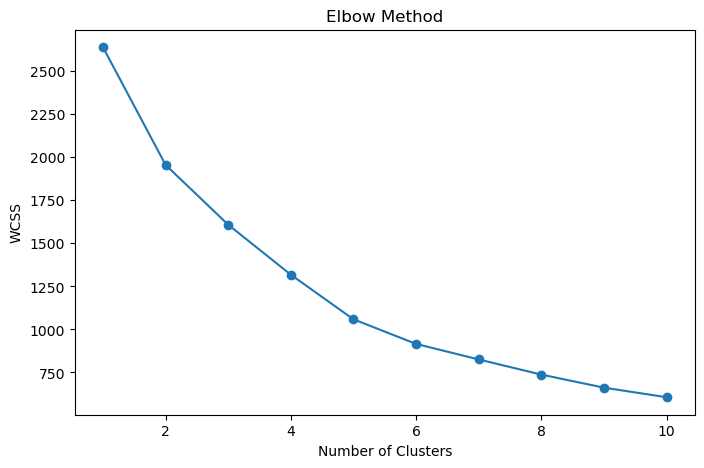

In [7]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [8]:
optimal_clusters = 3  
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', random_state=42)
data['KMeans_Cluster'] = kmeans.fit_predict(data_scaled)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


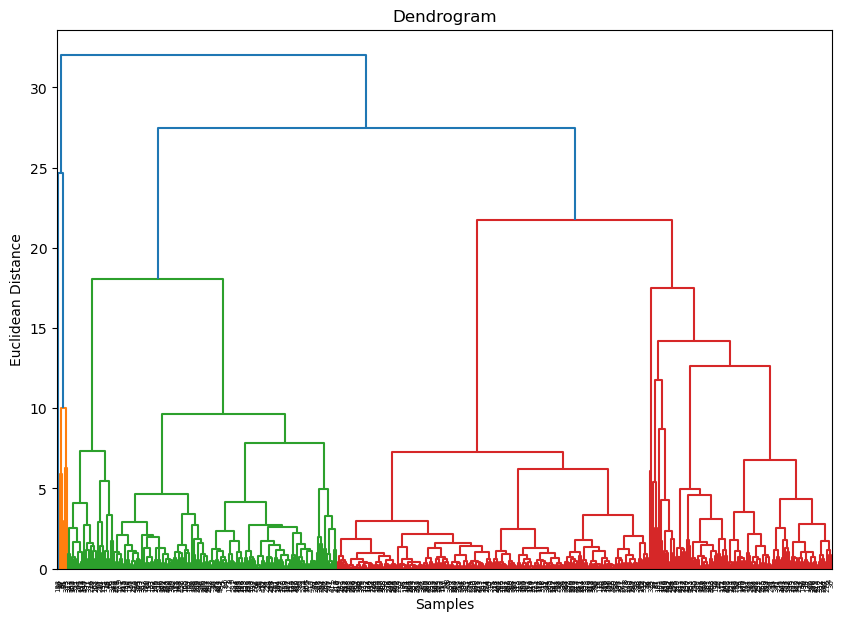

In [9]:
linkage_matrix = linkage(data_scaled, method='ward')
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix)
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Euclidean Distance')
plt.show()

In [10]:
data['Hierarchical_Cluster'] = fcluster(linkage_matrix, optimal_clusters, criterion='maxclust')

In [12]:
data.to_csv('Clustered_Wholesale.csv', index=False)
print("Clustered dataset saved as 'Clustered_Wholesale.csv'")

Clustered dataset saved as 'Clustered_Wholesale.csv'


In [13]:
from sklearn.metrics import adjusted_rand_score, confusion_matrix

In [14]:
similarity_score = adjusted_rand_score(data['KMeans_Cluster'], data['Hierarchical_Cluster'])
print(f"Adjusted Rand Index: {similarity_score}")

Adjusted Rand Index: 0.1967335070337952


In [15]:
conf_matrix = pd.crosstab(data['KMeans_Cluster'], data['Hierarchical_Cluster'], rownames=['K-Means'], colnames=['Hierarchical'])
print("\nConfusion Matrix:\n")
print(conf_matrix)


Confusion Matrix:

Hierarchical  1    2    3
K-Means                  
0             5   38    2
1             0  115  278
2             1    0    1


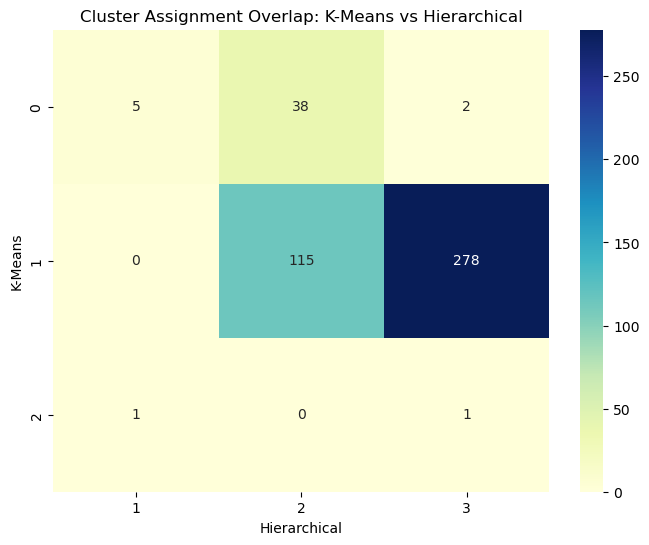

In [16]:
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="YlGnBu")
plt.title('Cluster Assignment Overlap: K-Means vs Hierarchical')
plt.show()